In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.pipeline import Pipeline


In [123]:

df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [124]:
print(df.shape)
df.info()
df.isnull().sum()


(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [125]:
df = df.drop('Unnamed: 32',axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [126]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [127]:
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


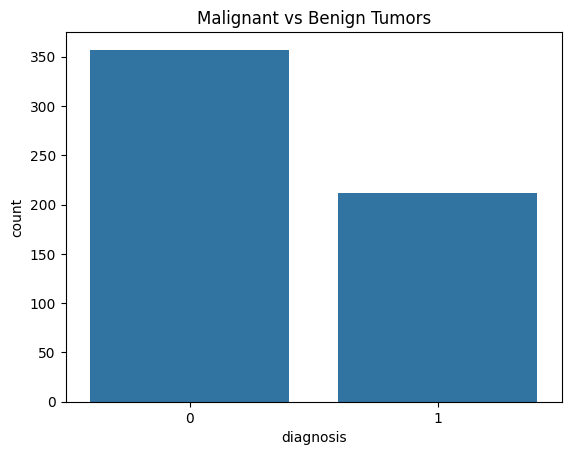

In [129]:
sns.countplot(x=df["diagnosis"])
plt.title("Malignant vs Benign Tumors")
plt.show()


In [130]:

correlation_with_target = df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False)
correlation_with_target = correlation_with_target.drop('diagnosis')

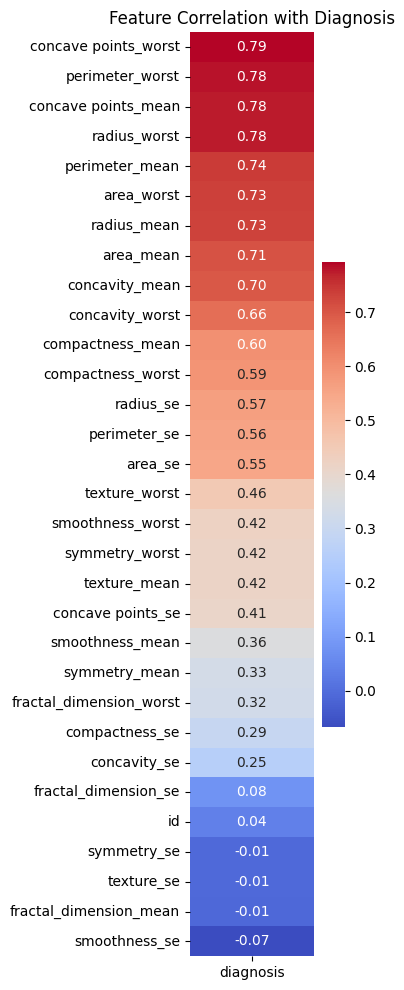

In [131]:


plt.figure(figsize=(2, 12)) # Set a narrow, tall figure size
sns.heatmap(
    correlation_with_target, 
    annot=True,              # Show the correlation value on the map
    cmap='coolwarm',          # A good color map for single-column visualization
    fmt=".2f"
)

plt.title('Feature Correlation with Diagnosis')
plt.show()

In [132]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


(569, 31)
(569,)


In [133]:
pipeline = ([
    ('scaler', StandardScaler()),
    ('pca', PCA()),                 
    ('logistic', LogisticRegression())
])
logistic_pipeline = Pipeline(pipeline)

param_grid = {
    'pca__n_components': [5, 10, 15]       
}

grid_search_logistic = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=param_grid,
    cv=5,                 
    scoring='accuracy',   
    n_jobs=-1             
)

In [134]:
grid_search_logistic.fit(x_train,y_train)
y_predict = grid_search_logistic.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
report = classification_report(y_test,y_predict)
print(report)

[[71  0]
 [ 1 42]]
0.9912280701754386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [135]:
knn_pipeline = ([
    ('scaler', StandardScaler()),
    ('pca', PCA()),                 
    ('knn', KNeighborsClassifier())
])
knn_pipeline = Pipeline(knn_pipeline)

param_grid = {
    'pca__n_components': [5, 10, 15],             
    'knn__n_neighbors': [3, 5, 7, 9],              
    'knn__weights': ['uniform', 'distance']        
}

grid_search_kn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=5,                 
    scoring='accuracy',   
    n_jobs=-1             
)


In [136]:
grid_search_kn.fit(x_train,y_train)
y_predict = grid_search_kn.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
report = classification_report(y_test,y_predict)
print(report)

[[69  2]
 [ 3 40]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [137]:

rf_pipeline_steps = [
    ('scaler', StandardScaler()),              
    ('rf', RandomForestClassifier(random_state=42)) # Using a random state for reproducibility
]

rf_pipeline = Pipeline(rf_pipeline_steps)

# Define the parameter grid for GridSearchCV
# Note: PCA is usually less critical for tree-based models like Random Forests, 
# but we keep it here to match the template structure.
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],             # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],            # Maximum depth of the trees (None means infinite)
    'rf__min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'rf__criterion': ['gini', 'entropy']            # Function to measure the quality of a split
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metric to optimize (e.g., 'accuracy', 'f1', 'roc_auc')
    n_jobs=-1             # Use all available CPU cores for parallel processing
)

In [138]:
grid_search_rf.fit(x_train,y_train)
y_predict = grid_search_rf.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
report = classification_report(y_test,y_predict)
print(report)

[[70  1]
 [ 3 40]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [139]:
svc_pipeline = [
    ('scaler', StandardScaler()),
    ('pca', PCA()), # New step: Principal Component Analysis
    ('svc', SVC(random_state=42, probability=True)) # SVC model
]
svc_pipeline = Pipeline(svc_pipeline)

# 2. Define the Parameter Grid for SVC (Hyperparameter Tuning)
# Note: The total number of combinations for this grid is very large, 
# which will result in long computation time.
param_grid_svc = {
    # PCA Hyperparameter: n_components
    # Determines the number of principal components to keep.
    'pca__n_components': [5, 10, 20], # Try keeping 5, 10, 20 components, or components that retain 95% variance (0.95)

    # SVC Hyperparameters
    'svc__C': [0.1, 1, 10], # Regularization parameter (simplified for faster runtime)
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': [2, 3, 4] # Only relevant if kernel='poly'
}

# 3. Create the GridSearchCV object
grid_search_svc = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid_svc,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metric to optimize
    n_jobs=-1             # Use all available CPU cores
)

In [140]:
grid_search_svc.fit(x_train,y_train)
y_predict = grid_search_svc.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
report = classification_report(y_test,y_predict)
print(report)

[[70  1]
 [ 1 42]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [141]:
xgb_pipeline_steps = [
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='logloss' # Set a classification metric for consistency
    )) 
]
xgb_pipeline = Pipeline(xgb_pipeline_steps)

# 2. Define the Parameter Grid for XGBoost (Hyperparameter Tuning)
# Parameters are prefixed with 'xgb__' to target the XGBClassifier step.
param_grid_xgb = {

    # Booster Parameters
    'xgb__n_estimators': [100, 300, 500],             # Number of boosting rounds (trees)
    'xgb__learning_rate': [0.01, 0.1, 0.2],           # Step size shrinkage to prevent overfitting (eta)
    'xgb__max_depth': [3, 6, 9],                 # Fraction of features used for fitting trees
    'xgb__gamma': [0, 0.1]                            # Minimum loss reduction required to make a split
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metric to optimize
    n_jobs=-1             # Use all available CPU cores
)

In [142]:
grid_search_xgb.fit(x_train,y_train)
y_predict = grid_search_xgb.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
report = classification_report(y_test,y_predict)
print(report)

C:\Users\DELL\AppData\Roaming\Python\Python314\site-packages\xgboost\training.py:199: UserWarning: [19:52:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[70  1]
 [ 3 40]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [143]:
import joblib

joblib.dump(grid_search_logistic.best_estimator_, "model.pkl")


['model.pkl']